# 1. Bias-Variance Trade-Off
As we get started with ensemble methods, we will being by looking at the **bias-variance trade-off**. There are three key terms in particular that we are going to look at:
> 1. **Bias**
2. **Variance**
3. **Irreducible Error**

We can start be looking into irreducible error...

---
<br></br>
# 1.1 Irreducible Error
When we say the term irreducible error, what exactly do we mean? Well, this term comes from the fact that data generating processes are **noisy**. By definition, noise is *random* (aka not deterministic). This in turn mean that we cannot predict the exact values that we are going to get, but rather it's statistics, like **mean** and **variance**. This can be best illustrated with an equation. Say we know that the *true function* that is generating our response data, $Y$ is $f(x)$. Well, the full equation for $Y$ would look like:

#### $$Y = f(X) + \epsilon$$

Where $\epsilon$ is the **irreducible error** term, which can be thought of as **noise**. Visually this can be seen below:

<img src="images/one-input-variable.png">

<img src="images/two-input-variables.png">

The black line in the 2d plot, and the blue surface in the 3d plot represent our **true target function**, $f(x)$. This is the function that is actually used to generate all of the red points. However, we can see that the red points don't perfectly map to $f(x)$. This is due to the irreducible error, or the inherent noise in the system that we cannot get rid of. 

From a machine learning perspective, let's say that we are in charge of the data-generating process, and our exact function is:

#### $$f(x) = 2x + 1$$

We are performing linear regression in this case. Now if a machine learning researcher was working with the data and we gave him this exact function, his work would already be done! Because he has the **true function** there is nothing more he can do to make things more accurate. However, again we cannot forget about the irreducible error, which makes our equation look like:

#### $$f(x) = ax + b + \epsilon$$

We know that the noise is random, and we generally assume that is is **gaussian distributed** with 0 mean. 
#### $$\epsilon \approx N(0, \sigma^2) $$

In other words, we are starting with a fixed pattern this is based on some underlying function, and then we add noise to it (this noise is the irreducible error): 

<img src="images/i-error-1.png">

<img src="images/i-error-2.png">

So, even when *we* are responsible for the data generating process, we cannot predict what the noise will be! So even though we know the *exact* function that the data came from, our own predictions won't be perfect, because there is noise. This is irreducible error. 

#### $$\hat{f}(x) = 2x + 1 $$

Will not achieve 0 error on:

#### $$f(x) = y = 2x + 1 + \epsilon$$

---
<br></br>
# 1.2 Bias
Now let's talk about the **bias**. This is a slightly weird term since we also use the term bias when talking about the intercept in linear transformations. That is not the bias that we are talking about here. The bias we are discussing actually refers to the error in your model. In other words, it is **how far off your prediction is from the target**. 

#### $$bias = E\Big[f(x) - \hat{f}(x)\Big]$$

We can think of it as the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much simpler model. Below, we can see an example of this in regression:

<img src="images/large-bias.png">

The fitted function clearly does not represent the pattern in the data, so bias tells us how far off we are from the target. In this case we tried to approximate a convex function (complex) with a linear function (simple), and there was a bias error introduced. And below we can see a picture with small bias, however, you may get the feeling that we are overfitting (since it fits the data perfectly, but it is not following the main trend): 

<img src="images/small-bias.png">

And we can also have the same issue arise in classification:

<img src="images/large-bias-classification.png">

Again, it is a very simple model (not complex) and it does not fit the pattern well. We can also see a small bias below for classification. Again it is a complex decision boundary, which allows us to fit the data better, but we may suspect that it is overfitting:

<img src="images/small-bias-classification.png">

---
<br></br>
# 1.3 Variance
Now that we have looked at bias, we can now look at variance. We already know about variance in terms of statistics:
> How much a random variable deviates from its mean in squared units.

However, in the context of the **bias-variance** trade off, we mean something much more specific. Variance in this context tells us:
> The statistical variance of our predictor over all possible training sets that are drawn from this particular data generating process. 

**Variance** refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set. Since the training data are used to fit the statistical learning method, different training data sets will result in a different $\hat{f}$. But ideally the estimate for f should not vary too much between training sets. However, if a method has high variance then small changes in the training data can result in large changes in $\hat{f}$. In general, more flexible statistical methods have higher variance.

For example, if you have a model that overfits, in the sense that it can get perfect accuracy on any data set that it trains on - remember that these data sets are all drawn from the same process that we are trying to model. Well if each model is perfect for each training set, then each model will probably be very different from the others! In other words, these different models trained on different data sets from the same process will vary, and we are **measuring that variance**. 

Let's try and word that differently just one more time. Variance has nothing to do with accuracy! Variance just measures how **inconsistent** a predictor is over different training sets. Remember that our actual goal is not to achieve the lowest possible error rate. Our actual goal is to find the true $f(x)$. Being close to the training points is just a proxy solution. 

---
<br></br>
# 1.4 Model Complexity 
Variance is often used as a proxy for model complexity. Complexity is a malleable term and can mean different things for different classifiers. For example, a decision tree that is very deep can be considered very complex, whereas a shallow decision tree is not complex. For K-Nearest Neighbor, K=1 would be complex, K=50 would not. 

For linear models you can really see how this concept becomes malleable. For linear models you may initially think that each model has the same complexity because they are all linear. One line is no more complex than any other line. However, in terms of variance there is a difference. Recall that we often use regularization to prevent overfitting. Regularization encourages the weights of a model to be small or 0, which decreases the variance, and hence decreases the complexity as well. 

Another thing about linear models is that you may assume that they are not complex because they are linear, while nonlinear models are more "expressive". For example, you may look at something like decision trees and conclude that because decision trees can find nonlinear decision boundary that they are more complex. But linear doesn't necessarily mean not complex. A large dimensionality linear model can be more complex than a nonlinear model with just a few inputs. So its not a universal measure; it means different things depending on the context. 


---
<br></br>
# 2. Bias-Variance Trade-Off
In machine learning, we are always striving to minimize our error. We just saw that the best we can do is strive to get our error that it is so small that it is just equal to the irreducible error-this is when we know the true underlying function that generates the data. In this situation, since the only error is the irreducible error, then everything else (meaning the reducible error) is 0. 

We will go over the derivation soon, but the overall error is a combination of:
> 1. Bias
2. Variance
3. Irreducible Error

As a data scientist, the goal is clear: we want to make the bias and variance as small as possible! There is a problem however, which is known as the **bias-variance trade-off**. This tells us that we are trying to find a balance between bias and variance. So while we would love low bias and variance, what we find is that when we try and lower the bias, the variance increases, and vice-versa.

This has been seen before in the context of overfitting. When we overfit our training data our bias goes down, but our variance goes up. When we underfit the training data out bias increases but our variance goes down. The visualization below clearly demonstrates this. 

<br></br>
<img src="images/bias-variance-tradeoff.png">

The **sum** of bias and variance means that there is a minimum somewhere in the middle! Which also coincides approximately with the best generalization error. Another way of visualizing this can be seen below: 

<br></br>
<img src="images/bullseye.png">

Now, an important question to ask is: we talk about bias-variance being a tradeoff, but is it really a tradeoff? Is it possible to achieve lower bias, and lower variance at the same time? The trade-off occurs in the context of looking at the same model while we alter the complexity of that model. But what if we could somehow combine models, such that the overall result achieves better accuracy on the training set, and better generalization? 

---
<br></br>
# 3. Bias-Variance Decomposition 
We are now going to go through the math that shows the expected error is:
#### $$E[error] = bias^2 + variance + irreducible \; error$$
Note that people usually use mean-squared error function for both regression and classification scenarios, when talking about bias-variance decomposition. This is despite the fact that we don't use **MSE** when optimizing a classification model. You can try and derive this using another kind of error, but **MSE** is usually sufficient for getting the idea across. 

### 3.1 Basic Definitions 
So we will start with some basic definitions. $y$, which is the data that we observe is equal to the ground truth function $f(x)$ plus some noise that is centered at 0, $\epsilon$:
#### $$y = f(x) + \epsilon$$
We will call $\hat{f}$ our estimate of $f(x)$
#### $$\hat{f}(x) = estimate \;of\;f(x)$$
And we will say that the expected error is the mean squared error between $y$ and $\hat{f}$:
#### $$err = E\Big[(y - \hat{f}(x))^2\Big]$$

---
### 3.2 Decompose $y$ into ground truth function and noise
#### $$err = E\Big[(f(x) + \epsilon - \hat{f}(x))^2\Big]$$

---
### 3.3 Introduce new variable, $\bar{f}$
This new variable is equal to the mean of $\hat{f}$:
#### $$\bar{f}(x) = E\Big[\hat{f}(x)\Big]$$
We can then add and subtract this to the inside term, so that it mathematically remains the same:
#### $$err = E\Big[(f(x) + \epsilon - \hat{f}(x) + \bar{f}(x) - \bar{f}(x))^2\Big]$$

---
### 3.4 Combine $f$ and $\bar{f}$, $\hat{f}$ and $\bar{f}$
We will now combine $f$ and $\bar{f}$, as well as $\hat{f}$ and $\bar{f}$, while leaving $\epsilon$ by itself:
#### $$err = E\Big[\Big( (f(x)  - \bar{f}(x)) -  (\hat{f}(x) - \bar{f}(x)) + \epsilon \Big)^2\Big]$$

---
### 3.4 Multiply out terms
We now multiply out all of the terms, but be sure to keep $f - \bar{f}$ together, as well as $\hat{f} - \bar{f}$ together:

#### $$err = E\Big[(f(x) - \bar{f}(x))^2\Big] + E\Big[(f(x) - \bar{f}(x))(\epsilon - (\hat{f}(x) - \bar{f}(x)))\Big] + E\Big[(\hat{f}(x) - \bar{f}(x))^2\Big] - E\Big[(\hat{f}(x) - \bar{f}(x))(f(x) - \bar{f}(x) + \epsilon) \Big] + E\Big[ \epsilon^2 \Big] +  E\Big[\epsilon (f(x) = \bar{f}(x) - (\hat{f}(x) - \bar{f}(x)))\Big] $$

---
### 3.5 Useful Identities 
Next, we can use some properties that follow from how we define these variables, to simplify this equation. First, the mean of $\epsilon$ is 0, since the average value of the noise is 0:
#### $$E\Big[\epsilon\Big] = 0$$
#### $$E\Big[\epsilon^2\Big] = \sigma_\epsilon^2 + (E\Big[\epsilon\Big])^2 = \sigma_\epsilon^2$$

We also know that the mean of $\hat{f}$, $\bar{f}$, is just the expected value of $\hat{f}$:
#### $$\bar{f}(x) = E\Big[\hat{f}(x)\Big]$$

And hence we also know that the expected value of $\hat{f}$ minus $\bar{f}$ is also 0:
#### $$E\Big[\hat{f}(x) - \bar{f}(x)\Big] = E\Big[\hat{f}(x)\Big] - E\Big[\hat{f}(x)\Big] = 0$$

---
### 3.6 Decompose again
So, after plugging in the identities discussed above, we are left with 3 terms; one for the **bias**, one for the **variance**, and one for the **irreducible error**:
#### $$err = E\Big[(f(x) - \bar{f}(x))^2 \Big] + E\Big[(\hat{f}(x) - \bar{f}(x))^2\Big] + E\Big[\epsilon^2\Big]$$

Becuase $f(x)$ is not random and it is the ground truth, the expected value of it is just equal to $f(x)$, so the first term can be reduced:

#### $$err= \Big[f(x) - \bar{f}(x)\Big]^2 + E\Big[(\hat{f}(x) - \bar{f}(x))^2\Big] + E\Big[\epsilon^2\Big]$$

Which has brought us to our final bias-variance decomposition:
#### $$err = bias^2 + variance + \sigma_\epsilon^2$$

---
### 3.7 Key points
We have seen that the **bias** is the **ground truth** minus the **average estimator**, the **variance** is the **variance of the estimator**, and the **irreducible error** is the **variance of the data noise**. 

Also, just as a note, the expected $E$ is used when referring to random variables. Hence, the expected value of a random variable is just it's mean. 

---
### 3.8 High Level Summary
To summarize what we just did: 
> 1. We have shown that the expected error that we get for our model, meaning the mean squared error between the observed targets and our predictions, is the sum of the bias squared, variance, and irreducible error.
2. Remember, this is **not** the error between the true $f(x)$ and our model $\hat{f}(x)$, since we never actually see the true $f(x)$! We only see $y$ which is $f(x)$ plus some noise. 

---
# 4. Polynomial Regression 
In this portion of the walk through we are going to go through a demo utilizing **polynomial regression** in order to show that **bias decreases** as we increase the degree of the polynomial, whille **variance increases**. We will also plot the **test error** in order to show that it coincides with the sum of the squared bias and variance. 

We will start with our imports. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

Now we have some constants that we want to define: 
* The number of datasets that we want to look at is 50
* Noise variance 
* The maximum number of polynomials
* Number of data points 
* Size of training set

In [3]:
NUM_DATASETS = 50
NOISE_VARIANCE = 0.5 
MAX_POLY = 12
N = 25 
Ntrain = int(0.9 * N)

We will set a seed for **random number generation** for debugging purposes. 

In [4]:
np.random.seed(2)

And now lets write a function for generating a polynomial from X. We will also quickly define a function **f(x)**.

In [5]:
"""
 Function make_poly
 Params: x (size N), D (maximum degree)
"""
def make_poly(x, D):
    N = len(x)
    X = np.empty((N, D + 1))       # the plus 1 is for the bias term 
    
    # loop through all dimensions
    for d in range(D + 1): 
        X[:, d] = x**d                   # sets x for column d to x raised to the dth power
        if d > 1:                        # if d > 1, normalize the column 
            X[:, d] = (X[:, d] - X[:, d].mean()) / X[:, d].std()
    return X    

"""
Function that takes in a 1 dimensional X (not the polynomial), and returns the sin(X)
"""
def f(X):
    return np.sin(X)

Our next step is to define some axis data for plotting.

In [6]:
x_axis = np.linspace(-np.pi, np.pi, 100)
y_axis = f(x_axis)

Now we can define our actual dataset X, as well as create of f(x) values. 

In [7]:
X = np.linspace(-np.pi, np.pi, N)      # shape (25 x 1)
np.random.shuffle(X)
f_X = f(X)                             # ground truth function

And then let's create a polynomial out of X.

In [8]:
Xpoly = make_poly(X, MAX_POLY)     # shape (25 x 13)

Create some empty arrays to hold our data as we loop through our experiment:

In [9]:
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))
train_predictions = np.zeros((Ntrain, NUM_DATASETS, MAX_POLY))
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))

With all of that out of the way, we can talk about the actual experiment. We are going to run through our experiment `NUM_DATASETS` times (50 times), randomly generate training data from our **ground truth function**, to the specific instance of training data, and then we are going to average those to find the bias and variance. 

So, in other words we are going to:
> 1. Start our outer loop, which will run for 50 iterations
2. Each iteration will: create `Y` data based on the ground truth function, `f_X`, and noise. 3. Then we start an inner loop, which will iterate over each polynomial degree (12 total)
4. In this inner loop, we fit a linear regression model based on X input data that has the number of polynomials of the index `d` in the inner loop, and `Y` our specific data set based on the index `k` of the outer loop


So, we can now create our model, and start looping through our data sets. Some things to note:
1. `Y = f_X + np.random.randn(N) * NOISE_VARIANCE` is based on the equation we have gone over: 
#### $$y = f(x) + \epsilon$$
Only now our $\epsilon$ is centered at `NOISE_VARIANCE` and not 0. Our ground truth function, $f(x)$, from where all data will be generated, is the $sin(x)$ in this case. 

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


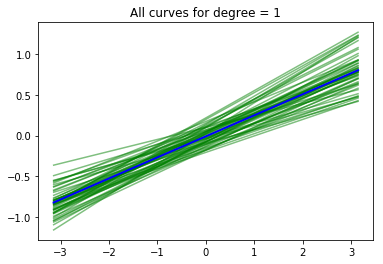

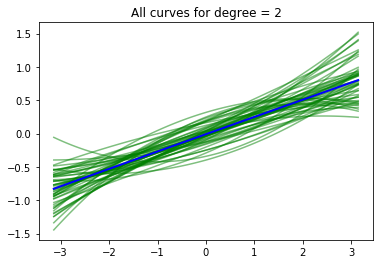

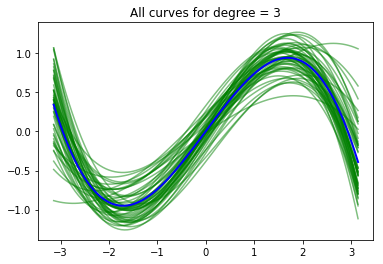

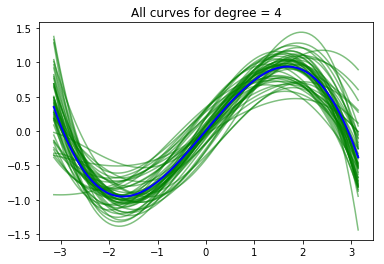

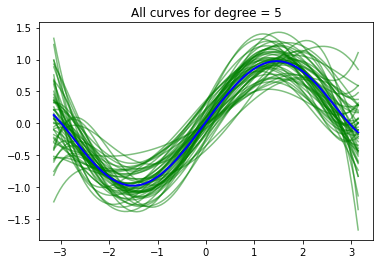

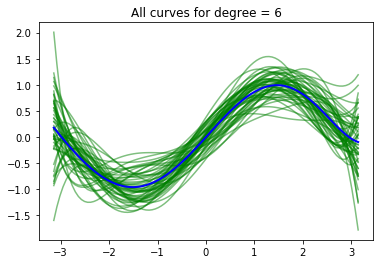

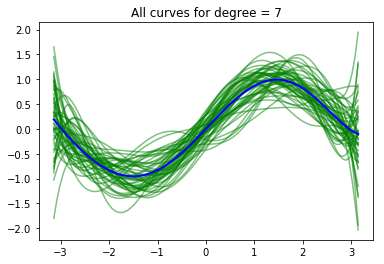

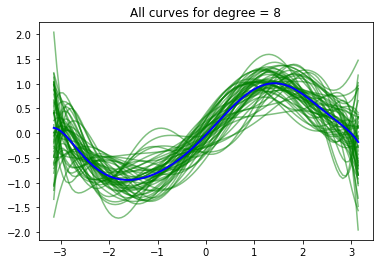

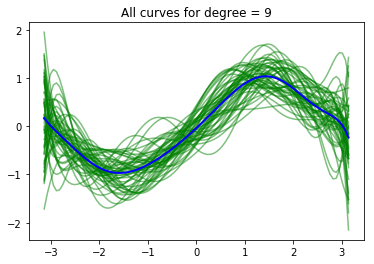

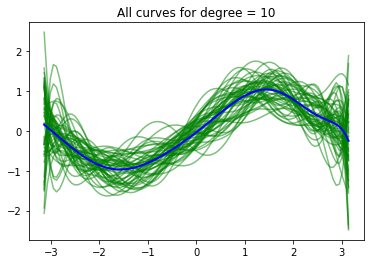

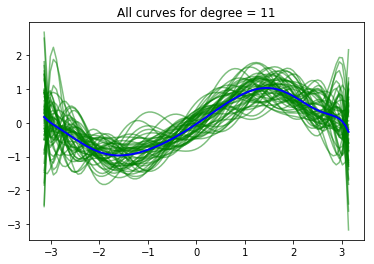

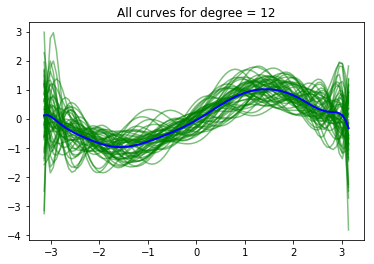

Phase 2 ------------------------------------


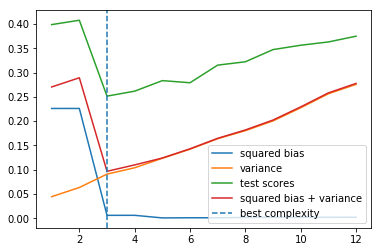

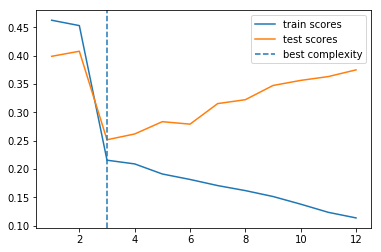

In [10]:
model = LinearRegression()

# looping through our total number of datasets
for k in range(NUM_DATASETS):
    Y = f_X + np.random.randn(N) * NOISE_VARIANCE   # specific data set for this experiment
    
    Xtrain = Xpoly[:Ntrain]                 # our training data, 22 x MAX_POLY 
    Ytrain = Y[:Ntrain]                     # Our response we are trying to map, 22 x 1 
    
    Xtest = Xpoly[Ntrain:]                  # test data, 3 x MAX_POLY, 3 x 13
    Ytest = Y[Ntrain:]                      # 3 x 1
    
    # looping through all of the polynomial degrees 
    for d in range(MAX_POLY):
        model.fit(Xtrain[:, :d + 2], Ytrain)         # an additional polynomial term each time
        predictions = model.predict(Xpoly[:, :d+2])  # make ALL predictions (train & test)
        
        # debug code for looking at our data
        x_axis_poly = make_poly(x_axis, d + 1)
        prediction_axis = model.predict(x_axis_poly)
        
        # all predictions over entire x axis
        # shape (100, 50, 12), holds predictions across x axis for each d and each dataset k 
        # in other words we train our model on 25 points, but then predict on 100 for plot
        prediction_curves[:, k, d] = prediction_axis 
        
        # grab train and test predictions
        train_prediction = predictions[:Ntrain]
        test_prediction = predictions[Ntrain:]
        
        # use this to calculate bias/variance later
        train_predictions[:,k,d] = train_prediction 
        
        # calculate train and test scores 
        train_score = mse(train_prediction, Ytrain)
        test_score = mse(test_prediction, Ytest)
        
        # store these scores 
        train_scores[k,d] = train_score
        test_scores[k,d] = test_score
    
# plot all prediction curves, along with mean curve 
for d in range(MAX_POLY):
    for k in range(NUM_DATASETS):
        # plot x axis, prediction curves at k d (specific data set, and specific polynomial)
        plt.plot(x_axis, prediction_curves[:,k,d], color='green', alpha=0.5)
    
    # plotting mean curve (mean of all k = 50 datasets, for specific degree d)
    plt.plot(x_axis, prediction_curves[:,:,d].mean(axis=1), color='blue', linewidth=2.0)
    plt.title("All curves for degree = %d" % (d+1))
    plt.show()

print('Phase 2 ------------------------------------')    
# next we need to calculate the squared bias and variance, so we can plot them afterwards
# first calculate the squared bias
avg_train_prediction = np.zeros((Ntrain, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_Xtrain = f_X[:Ntrain]
for d in range(MAX_POLY):               # loop through all of the polynomials
    for i in range(Ntrain):             # loop through all of the data points
        # find average train prediction for this data point and degree polynomial
        # equal to mean of train predictions at this data point, for all experiments, at 
        # this degree polynomial 
        avg_train_prediction[i,d] = train_predictions[i, :, d].mean()

    # squared bias is the average train prediction for this degree poly, minus f_Xtrain,
    # squared and then averaged
    squared_bias[d] = ((avg_train_prediction[:,d] - f_Xtrain)**2).mean()
    
# Calculate the Variances
variances = np.zeros((Ntrain, MAX_POLY))
for d in range(MAX_POLY):                  # loop through all of the polynomials
  for i in range(Ntrain):                  # loop through all of the data points
    delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
    variances[i,d] = delta.dot(delta) / N
variance = variances.mean(axis=0)

# make bias-variance plots
degrees = np.arange(MAX_POLY) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1
plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()

# train score vs test score
plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.axvline(x=best_degree, linestyle='--', label='best complexity')
plt.legend()
plt.show()

---
<br>

# 5. KNN and Decision Tree Demo
Let's now go through a small demo so we can see what high bias/low variance, and low bias/high variance look like for KNN and Decision Trees. We will look at 2 different scenarios, first regression and then classification. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.utils import shuffle

In [88]:
N = 20
Ntrain = 12

# create the data
X = np.linspace(0, 2*np.pi, N).reshape(N, 1)
Y = np.sin(3*X)
X, Y = shuffle(X, Y)

# get training data
Xtrain = X[:Ntrain]
Ytrain = Y[:Ntrain]

## 5.1 Regression
### 5.1.1 Decision tree - Low Bias, High Variance
We are going to utilize a maximum depth decision tree in order to see what the best it can do is.

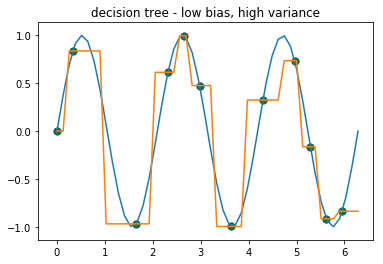

In [28]:
# decision tree - low bias, high variance
model = DecisionTreeRegressor() # default max_depth=None
model.fit(Xtrain, Ytrain)

# create true function data to plot (it will be a sin curve)
T = 50
Xaxis = np.linspace(0, 2*np.pi, T)
Yaxis = np.sin(3*Xaxis)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.title("decision tree - low bias, high variance")

plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.show()

We can see that our decision tree fit perfectly to the training data, but the training data wasn't really representative of the full training set. Just to really break this down in case it isn't clear I want to walk through what is being plotted step by step. First we have our $Y$ response (based on our true function): 
#### $$Y = sin(3x)$$
That function can be seen here:

In [ ]:
def plot_y_response():
# create true function data to plot (it will be a sin curve)
    T = 50
    Xaxis = np.linspace(0, 2*np.pi, T)
    Yaxis = np.sin(3*Xaxis)
    plt.plot(Xaxis, Yaxis)
    plt.show()
    
plot_y_response()

Okay great, now the thing to remember is that we don't actually have access to all of that $Y$ response data. There are 50 data points that go into making the plot above. However, we only have **12** training points. So we are trying to essnetially find a function that approximates the sin curve above, but only having 12 training responses and inputs to go off of. Let's plot those now.

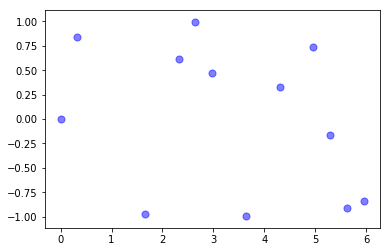

In [39]:
def plot_training_data():
    plt.scatter(Xtrain, Ytrain, s=50, alpha=0.5, c='blue')

plot_training_data()

So you can start to see that our training data doesn't really cover a ton of the input space, meaning that our decision tree has its work cut out for it. Now, lets train our model with the blue training data above, and then we can plot the predictions $\hat{Y}$ that our model makes on the training data. As a referrence, we want our predictions to match the blue dots, but not overfit!  

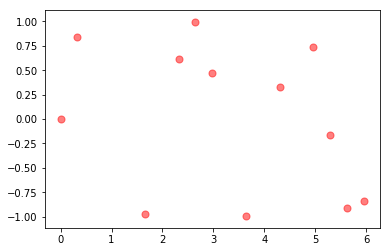

In [38]:
def train_model_plot_training_predictions():
    #instantiate model and train based off of 12 training points
    model = DecisionTreeRegressor()                            # default max_depth=None
    model.fit(Xtrain, Ytrain)
    
    Xtrain_predictions = model.predict(Xtrain.reshape(Ntrain, 1))
    
    plt.scatter(Xtrain, Xtrain_predictions, s=50, alpha=0.5, c='red')
    
train_model_plot_training_predictions()

Okay great, now we have a plot (red points above) that shows our model predictions for the 12 training inputs (remember, we have 12 x values that we are using to train our model, and then we want it to be able to generalize and make accurate predictions for any x input value). 

We can plot our observed training responses $Y$ and our model predictions $\hat{Y}$ on the same graph to see how they compare. 

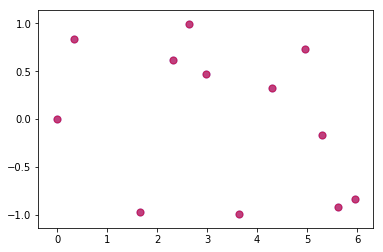

In [41]:
def plot_observed_response_and_predictions():
    plt.scatter(Xtrain, Ytrain, s=50, alpha=0.5, c='blue')
    
    Xtrain_predictions = model.predict(Xtrain.reshape(Ntrain, 1))
    plt.scatter(Xtrain, Xtrain_predictions, s=50, alpha=0.5, c='red')
    
plot_observed_response_and_predictions()

Awesome! The alpha value of the points was set to 0.5 so that they are partially transparent. So we can see that our predictions were **perfect**, because the blue and red points overlap completely, leaving us with the purple points shown above. 

The next step is to overlay the original observed response $Y$ for the 50 data points. Remember, this required 50 data points but our model was only able to be trained on 12. We will include the training points and prediction points as well. 

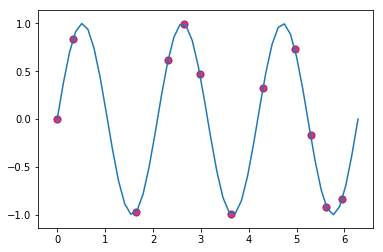

In [44]:
def plot_full_response_train_and_prediction():
    T = 50
    Xaxis = np.linspace(0, 2*np.pi, T)
    Yaxis = np.sin(3*Xaxis)
    plt.plot(Xaxis, Yaxis)
    
    plt.scatter(Xtrain, Ytrain, s=50, alpha=0.5, c='blue')
    
    Xtrain_predictions = model.predict(Xtrain.reshape(Ntrain, 1))
    plt.scatter(Xtrain, Xtrain_predictions, s=50, alpha=0.5, c='red')
    
plot_full_response_train_and_prediction()

Cool, so we can see that our predictions on the training points fall nicely on the full $Y$ response curve. However, let's finally pull in our last step and plot our predictions for 50 x inputs (the same number of inputs that have gone into making the blue curve). 

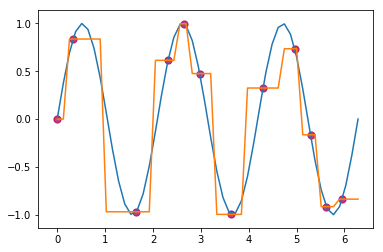

In [51]:
def plot_full_model_prediction_curve():
    T = 50
    Xaxis = np.linspace(0, 2*np.pi, T)
    Yaxis = np.sin(3*Xaxis)
    plt.plot(Xaxis, Yaxis)
    
    plt.scatter(Xtrain, Ytrain, s=50, alpha=0.5, c='blue')
    
    Xtrain_predictions = model.predict(Xtrain.reshape(Ntrain, 1))
    plt.scatter(Xtrain, Xtrain_predictions, s=50, alpha=0.5, c='red')
    
    Xaxis_predictions = model.predict(Xaxis.reshape(T, 1))
    plt.plot(Xaxis, Xaxis_predictions)
    
plot_full_model_prediction_curve()

And finally we have gotten to our original branching off point. What we can now see is the entire function that our model has learned, seen in yellow. We see that it **does** correctly predict all of the training data, but at the same time we can see that the training data wasn't really representative of the full data set. 

### 5.1.2 Decision tree regressor - High Bias, Low Variance
Okay now we are ready to move on to a decision tree that has high bias and low variance. 

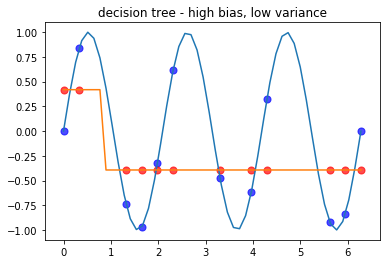

In [96]:
# decision tree - high bias, low variance
model = DecisionTreeRegressor(max_depth=1)
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='red')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("decision tree - high bias, low variance")
plt.show()

Wow, we can see now how all of our predictions are **very** off. The red dots are the predictions, and the blue dots are the training data. Hence, we can see that high bias means a very simple model. 

### 5.1.3 KNN - Low Bias, High Variance
Now we can look at KNN with low bias and high variance. 

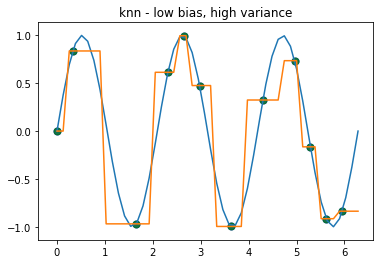

In [56]:
# knn - low bias, high variance
model = KNeighborsRegressor(n_neighbors=1)     # low bias means number of neighbors is 1
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("knn - low bias, high variance")
plt.show()

We end up with nearly the same pattern as the decision tree.

### 5.1.4 KNN - High Bias, Low Variance
Now we can look at KNN with high bias and low variance. 

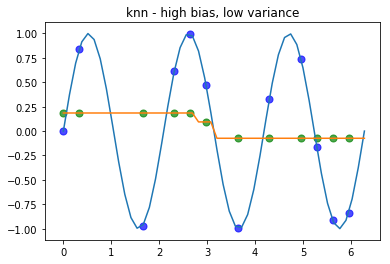

In [58]:
# knn - high bias, low variance
model = KNeighborsRegressor(n_neighbors=10)     # large number of neighbors
model.fit(Xtrain, Ytrain)

plt.scatter(Xtrain, Ytrain, s=50, alpha=0.7, c='blue')
plt.scatter(Xtrain, model.predict(Xtrain.reshape(Ntrain, 1)), s=50, alpha=0.7, c='green')
plt.plot(Xaxis, Yaxis)
plt.plot(Xaxis, model.predict(Xaxis.reshape(T, 1)))
plt.title("knn - high bias, low variance")
plt.show()

This is a similar situation to a decision tree where it is essentially just a flat line across. In both cases shown here, it looks like high complexity was the best option. 

## 5.2 - Classification 
Let's now look at classification. We will generate a data set of 2 gaussian clouds with a variance of 1.

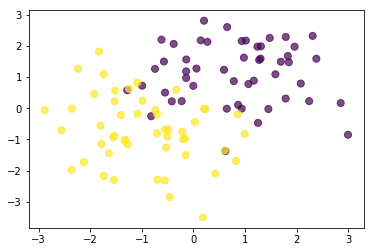

In [68]:
# generate the data
N = 100
D = 2
X = np.random.randn(N, D)
X[:N//2] += np.array([1, 1]) # center it at (1,1)
X[N//2:] += np.array([-1, -1]) # center it at (-1, -1)

Y = np.array([0]*(N//2) + [1]*(N//2))

# look at the data
plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plt.show()


def plot_decision_boundary(X, model):
  h = .02  # step size in the mesh
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))


  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

### 5.2.1 Decision Tree - Low Bias, High Variance

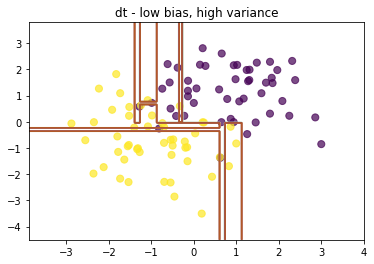

In [69]:
# dt - low bias, high variance
model = DecisionTreeClassifier()
model.fit(X, Y)

plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(X, model)
plt.title("dt - low bias, high variance")
plt.show()

We can see that the boundary is most likely more complex than it needs to be. 

### 5.2.2 Decision Tree - High Bias, Low Variance

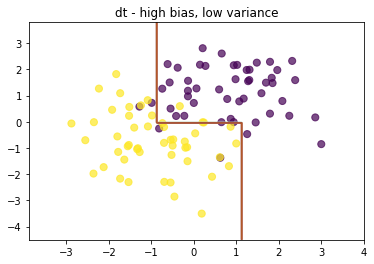

In [70]:
# dt - high bias, low variance
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, Y)

plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(X, model)
plt.title("dt - high bias, low variance")
plt.show()

Clearly the high bias option was better in this case as far preventing overfitting is concerned. 

### 5.2.3 KNN - Low Bias, High Variance

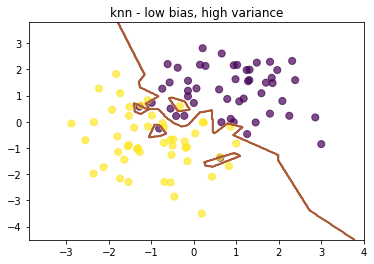

In [71]:
# knn - low bias, high variance
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, Y)

plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(X, model)
plt.title("knn - low bias, high variance")
plt.show()

Again, clearly the decision boundary is too complex.

### 5.2.4 KNN - High Bias, Low Variance

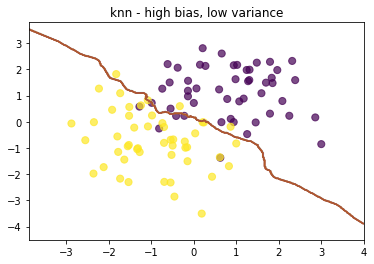

In [72]:
# knn - high bias, low variance
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X, Y)

plt.scatter(X[:,0], X[:,1], s=50, c=Y, alpha=0.7)
plot_decision_boundary(X, model)
plt.title("knn - high bias, low variance")
plt.show()

We can see that this is a much better fit and provides a much better decision boundary. 

---
<br>

# 6. Cross Validation 
We are now going to look at cross validation as a method for optimizing the bias-variance tradeoff. We have already looked at cross validation before, mainly as a way to chose hyperparameters. The main motivation behind that was that we didn't want to just achieve good training error, we wanted to achieve good generalization error too. 

Cross validation always contains score for the predictions outside the training set, which is what we use as an estimate of test error. Now, we are still using cross validation, but the difference in motivation is subtle. We saw in the polynomial regression example that the point at which the sum of the bias squared and variance is minimum corresponds approximately to the minimum test error as well. So, by using cross validation to look for the minimum score, we are also finding the best bias-variance balance as well. 

Lets summarize those differences:
> **Before**: We used cross validation to find the best hyperparameters <br>
**Now**: We are using cross validation to find the best model complexity (which actually boils down to just choosing the best hyperparameters anyway)<br>
**Before**: We used cross-validation to optimize generalization error<br>
**Now**: We are using cross validation to optimize $bias^2 + variance$ (which still corresponds to generalization error)

So, we are still doing the same thing, it is just from a slightly different perspective. 

## 6.1 K-Fold Cross-Validation
Let's go over **K-Fold Cross Validation** to review. The idea is simple, we do the following:
> 1. Split data into K parts
2. Do a loop that iterates through K times
3. Each time we take out one part, and use that as the validation set, and the rest of the data as the training set

So in the first iteration of the loop, we validate with the first part, and train on the rest. 

<img src="images/k-folds-validation.png">

Here is some pseudocode that can do this:
```
def crossValidation(model, X, Y, K=5):
    X, Y = shuffle (X, Y)
    sz = len(Y) / K
    scores = []
    for k in range(K):
        xtr = np.concatenate([ X[:k*sz, :], X[(k*sz + sz):, :] ])
        ytr = np.concatenate([ Y[:k*sz], X[(k*sz + sz):] ])
        xte = X[k*sz:(k*sz + sz), :]
        yte = Y[k*sz:(k*sz + sz)]
        
        model.fit(xtr, ytr)
        score = model.score(xte, yte)
        scores.append(score)
    return np.mean(scores), np.std(scores)
```

Now, we can see that this algorithm contains **K** different scores. We can simply use the mean of these of these scores as a measurement for how good this particular hyperparameter setting is. Another thing we could do is a statistical test to determine if the difference between two hyperparameter settings is statistically significantly better than the other.

## 6.2 Sci-Kit Learn K-Folds
Sci-Kit learn has its own K-folds implementation that is great to use:

```
from sklearn import cross_validation
scores = cross_validation.cross_val_score(model, X, Y, cv=K)
```

Note that the SKLearn implementation does require you to conform to certain aspects of the SKLearn API. For example, you must provide a class with at least the 3 methods `fit()`, `predict()`, and `score()`. 

## 6.3 Leave-One-Out Cross-Validation
One special variation of K-Folds cross-validation is where we set K = N. We will talk more about this later. But the basic idea is:
> 1. We do a loop N times 
2. Every iteration of the loop we train on everything but one point 
3. We test on the one point that was left out
4. We do this N times for all points 